# Tarea semanal 6

#### Franco Ruggiero

Se pide diseñar un filtro pasabanda que cumpla con la siguiente plantilla:



* $\omega_o = 2\pi22kHz$
* $Q = 5$
* Aproximacion Chebyshev con ripple de 0.5dB


* $f_{s1} = 17kHz \longrightarrow |T(f_{s1})| = -16dB$
* $f_{s1} = 36kHz \longrightarrow |T(f_{s2})| = -24dB$

<center><img src="PlantillaBPCheby.png" style="width:600px"> <center>


1) Obtener la plantilla de diseño pasabanda normalizada

> <center> <img src="TS6_1.jpg" style="width:600px"> <center>
> <center> <img src="TS6_2.jpg" style="width:600px"> <center>

In [3]:
from pytc2.sistemas_lineales import analyze_sys, pretty_print_lti, tf2sos_analog, pretty_print_SOS, parametrize_sos, pretty_print_bicuad_omegayq
from pytc2.general import Chebyshev_polynomials, s, w, print_subtitle, print_latex, a_equal_b_latex_s
import sympy as sp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

In [4]:

alpha_max = 0.5
omegaS1 = 975/374
omegaS2 = 1015/198
alpha_min1 = 16
alpha_min2 = 24

eeps = 10**(alpha_max/10)-1  # eeps = eps al cuadrado
eps = np.sqrt(eeps)
print('eps = ', eps )   
print('eeps = ', eeps)

print('')

n = (np.arccosh(np.sqrt( (10**(0.1*alpha_min1) - 1) / (10**(0.1*alpha_max) - 1) ))) / (np.arccosh(omegaS1)) 
print('n1 = {:f}'. format(n))

n = (np.arccosh(np.sqrt( (10**(0.1*alpha_min2) - 1) / (10**(0.1*alpha_max) - 1) ))) / (np.arccosh(omegaS2)) 
print('n2 = {:f}'. format(n))

print('')

eps =  0.34931140018894796
eeps =  0.12201845430196334

n1 = 2.216358
n2 = 1.943992



In [5]:
n = 3

2. Obtener la función transferencia normalizada del prototipo pasabajo que satisfaga el requerimiento del filtro pasabanda.

><center> <img src="TS6_3.jpg" style="width:600px"> <center>
><center> <img src="TS6_4.jpg" style="width:600px"> <center>
><center> <img src="TS6_5.jpg" style="width:600px"> <center>

*Verifico con python*

In [6]:

chebn_expr = Chebyshev_polynomials(n)

# obtengo T_ch(s) = T(s)*T(-s) 
# Tch_jw = (1/eeps) / (1/eeps + chebn_expr**2)
Tch_jw = -(1/(eeps*16)) / (-(1/eeps + chebn_expr**2)/16)
j = sp.I

Tch_s = Tch_jw.subs(w, s/j)

print('')
display(sp.expand(Tch_s))
print(' ')

-0.512217601489436/(s**6 + 3*s**4/2 + 9*s**2/16 - 0.512217601489436)

In [7]:

num_Tch_s = np.array([(-1)/(eeps*16)])
den_Tch_s = np.array([ 1 , 0 , 3/2 , 0 , 9/16 , 0 , -1/(eeps*16) ]) 

Taux = sig.TransferFunction(num_Tch_s , den_Tch_s)

roots_den_Tch_s = np.roots(den_Tch_s)

# obtengo las raices de T(s) filtrando las de T(-s)
roots_den_T_s = roots_den_Tch_s[np.real(roots_den_Tch_s) < 0]

print(' ')
print(roots_den_T_s)
print(' ')

 
[-0.31322824+1.02192749j -0.31322824-1.02192749j -0.62645649+0.j        ]
 


In [8]:
# verificacion con cheblap

z,p,k = sig.cheb1ap(n, alpha_max)
num_cheb, den_cheb = sig.zpk2tf(z,p,k)

sos_cheb = tf2sos_analog(num_cheb, den_cheb)

print(' ')
pretty_print_SOS(sos_cheb, mode='omegayq')
print(' ')

<IPython.core.display.Math object>

3. Obtener la transferencia pasabanda normalizada

><center> <img src="TS6_6.jpg" style="width:600px"> <center>

In [9]:
Q_bp = 5

num_bp, den_bp = sig.lp2bp(num_cheb, den_cheb, bw = 1/Q_bp)

print('')
pretty_print_lti(num_bp, den_bp, displaystr=True)
print('')
# pretty_print_bicuad_omegayq(num_bp, den_bp, displaystr=True) #error de compilacion

sos_bp = tf2sos_analog(num_bp, den_bp)
pretty_print_SOS(sos_bp, mode='omegayq', displaystr=True)
print('')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

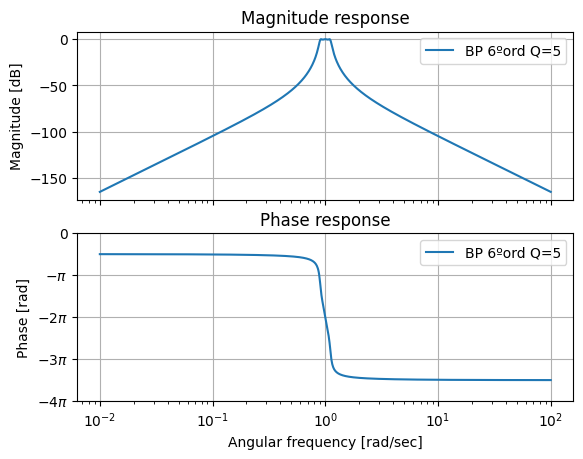

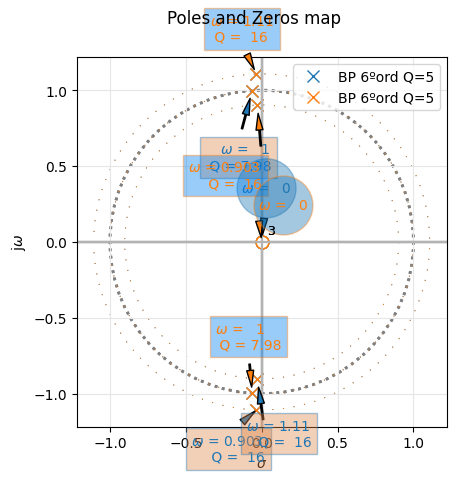

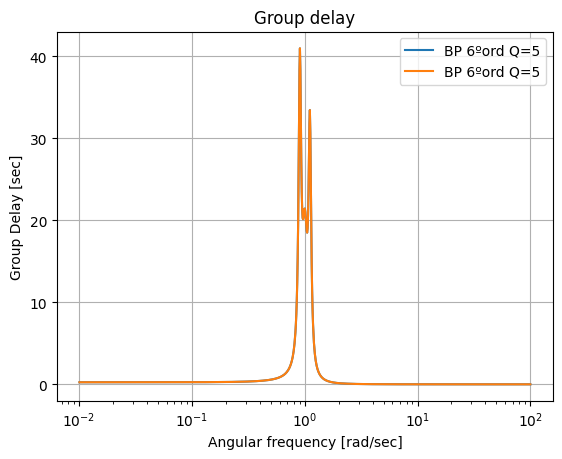

In [16]:
%matplotlib inline
# %matplotlib auto

T_bp =  sig.TransferFunction( num_bp, den_bp )

_= analyze_sys([T_bp], sys_name='BP 6ºord Q={:d}'.format(Q_bp)) # el caracter "_" descarta la salida de la función

4. Implementar mediante secciones pasivas separadas por seguidores de tensión activos.

><center> <img src="TS6_7.jpg" style="width:600px"> <center>
><center> <img src="TS6_8.jpg" style="width:600px"> <center>
>
- **Simulando en LTSpice:**

><center> <img src="4_secciones_pasivas_draft.png" style="width:800px"> <center>
><center> <img src="4_secciones_passivas.png" style="width:800px"> <center>
><center> <img src="4_secciones_pasivas_delay.png" style="width:800px"> <center>

5. Activar las redes pasivas mediante la red propuesta aquí debajo y comprobar mediante simulación el comportamiento deseado.

<center><img src="circuito_normallizado.png" style="width:600px"> <center>




    
Respecto al informe, se mantiene el mismo formato usado hasta el momento, informe en jupyter-notebook, simulaciones en python y LTspice. Se mantienen las recomendaciones para la inclusión de gráficas y resultados de la simulación, y se agrega:

+ Cada figura deberá tener una leyenda o un párrafo que haga referencia a ella

+ Al menos una sección donde:

     * se discutan los resultados obtenidos, factibilidad de implementación de la red, componentes sensibles, etc.

     * se informe las dificultades o problemas, si las hubiera

     * se destaquen los aspectos salientes de la resolución propuesta.
